# Titanic Project

Kaggle Titanic data project, with small of data

In [2]:
## importing all the package you need
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from numpy._distributor_init import NUMPY_MKL

# from sklearn.linear_model import LinearRegression
# from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
## https://www.dataquest.io/mission/74/getting-started-with-kaggle

import seaborn as sns

In [3]:
sns.__version__

'0.9.0'

In [4]:
RAW_PATH="../data/raw/"

### Data Cleansing

In [5]:
# We can use the pandas library in python to read in the csv file.
# This creates a pandas dataframe and assigns it to the titanic variable.
ti_train = pd.read_csv(RAW_PATH+"train.csv")
ti_test = pd.read_csv(RAW_PATH+"test.csv")

# Print the first 5 rows of the dataframe.
ti_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
## integer
1,2,3

## float
1.0,2.1,3.4

## string
'22','33'


('22', '33')

In [7]:
ti_train.describe()

## Unbalanced data = 0.38 only that is true
## Missing value on age

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
## categorize the columns
numeric_col=["Age","Fare","SibSp","Parch"]
categoric_col=["Pclass","Ticket","Sex","Embarked","Cabin"]
target_col=["Survived"]

data_types=ti_train.dtypes
data_types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
ti_train['Pclass']=ti_train.Pclass.astype(str)

In [10]:
ti_train[categoric_col].describe()

,Pclass,Ticket,Sex,Embarked,Cabin
count,891,891,891,889,204
unique,3,681,2,3,147
top,3,CA. 2343,male,S,C23 C25 C27
freq,491,7,577,644,4


## Numerical Column EDA

In [11]:
ti_train.shape

(891, 12)

In [12]:
numeric_col

['Age', 'Fare', 'SibSp', 'Parch']

In [13]:
ti_train[numeric_col].corr()

,Age,Fare,SibSp,Parch
Age,1.000000,0.096067,-0.308247,-0.189119
Fare,0.096067,1.000000,0.159651,0.216225
SibSp,-0.308247,0.159651,1.000000,0.414838
Parch,-0.189119,0.216225,0.414838,1.000000


#### 1.Age

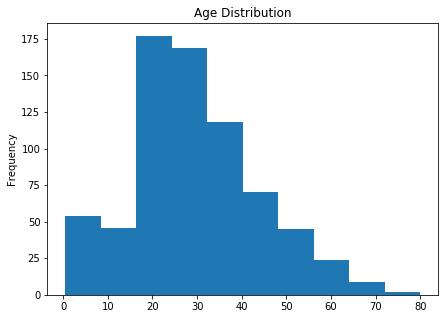

In [14]:
ti_train['Age'].plot(kind="hist",bins=10,figsize=(7,5),title="Age Distribution")

In [15]:
ti_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
ti_train.Age.isnull().sum(),ti_test.Age.isnull().sum()

(177, 86)

In [17]:
## Imputation.. -> Handling missing value

# Median
# Mean
# Mice
# EM
# consider the other features

median_age=np.percentile(ti_train[~(ti_train.Age.isnull())].Age,50)
ti_train["Age2"]=ti_train.Age.fillna(median_age)
ti_test["Age2"]=ti_test.Age.fillna(median_age)

In [18]:
ti_train.groupby("Survived").agg({"Age":[np.size,np.mean]})

Age           
           size       mean
Survived                  
0         549.0  30.626179
1         342.0  28.343690

#### 2. Fare

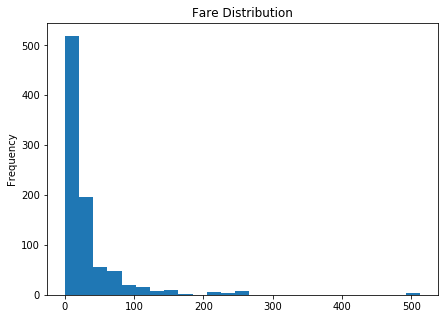

In [19]:
ti_train['Fare'].plot(kind="hist",bins=25,figsize=(7,5),title="Fare Distribution")

In [20]:
ti_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [21]:
fare_up=np.percentile(ti_train.Fare,98)
fare_low=np.percentile(ti_train.Fare,2)

In [22]:
ti_train["Fare_cap"]=np.where(ti_train.Fare<fare_low,fare_low,
                           np.where(ti_train.Fare>fare_up,fare_up,ti_train.Fare))
# ti_train.Fare.sort_values()

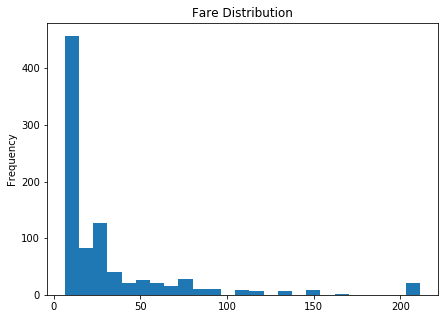

In [23]:
ti_train['Fare_cap'].plot(kind="hist",bins=25,figsize=(7,5),title="Fare Distribution")

In [24]:
ti_train.Fare_cap.describe()

count    891.00000
mean      30.79061
std       39.82766
min        6.39750
25%        7.91040
50%       14.45420
75%       31.00000
max      211.33750
Name: Fare_cap, dtype: float64

In [25]:
ti_train.Fare_cap.isnull().sum(),ti_test.Fare.isnull().sum()

(0, 1)

In [36]:
## Imputation.. -> Handling missing value

# Median
# Mean
# Mice
# EM
# consider the other features

median_fare=np.percentile(ti_train[~(ti_train.Fare_cap.isnull())].Fare_cap,50)
ti_test["Fare_cap"]=ti_test.Fare.fillna(median_fare)
ti_test["Fare_cap"]=np.where(ti_test.Fare<fare_low,fare_low,
                           np.where(ti_test.Fare>fare_up,fare_up,ti_test.Fare))

In [27]:
ti_train.groupby("Survived").agg({"Fare_cap":[np.size,np.mean]})

Fare_cap           
             size       mean
Survived                    
0           549.0  21.985296
1           342.0  44.925456

#### 3. SibSp

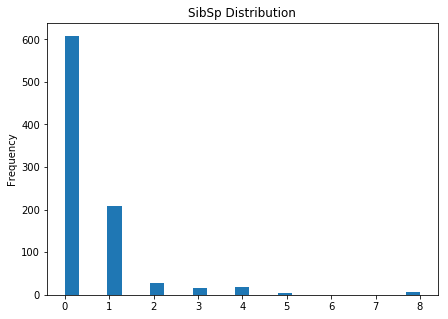

In [28]:
ti_train['SibSp'].plot(kind="hist",bins=25,figsize=(7,5),title="SibSp Distribution")

In [29]:
ti_train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [30]:
ti_train.SibSp.isnull().sum(),ti_test.SibSp.isnull().sum()

(0, 0)

In [31]:
ti_train.groupby("Survived").agg({"SibSp":[np.size,np.mean]})

SibSp          
          size      mean
Survived                
0          549  0.553734
1          342  0.473684

#### 4. Parch

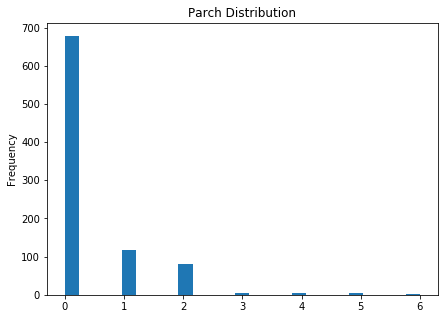

In [32]:
ti_train['Parch'].plot(kind="hist",bins=25,figsize=(7,5),title="Parch Distribution")

In [33]:
ti_train.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [34]:
ti_train.Parch.isnull().sum(),ti_test.SibSp.isnull().sum()

(0, 0)

In [35]:
ti_train.groupby("Survived").agg({"Parch":[np.size,np.mean]})

Parch          
          size      mean
Survived                
0          549  0.329690
1          342  0.464912

## Categoric_col

In [39]:
categoric_col

['Pclass', 'Ticket', 'Sex', 'Embarked', 'Cabin']

In [37]:
ti_train[categoric_col].describe()

,Pclass,Ticket,Sex,Embarked,Cabin
count,891,891,891,889,204
unique,3,681,2,3,147
top,3,CA. 2343,male,S,C23 C25 C27
freq,491,7,577,644,4


1.Pclass

In [114]:
cc="Pclass"
titanic.groupby(cc).Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [115]:
titanic[cc].astype(str).describe()

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: object

2.Embarked

In [119]:
cc="Embarked"
titanic.groupby(cc).Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [120]:
titanic[cc].astype(str).describe()

count     891
unique      4
top         S
freq      644
Name: Embarked, dtype: object

In [121]:
titanic[~(titanic[cc].isnull())][cc].astype(str).describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

3.Cabin

In [116]:
cc="Cabin"
titanic.groupby(cc).Survived.mean()

Cabin
A10      0.000000
A14      0.000000
A16      1.000000
A19      0.000000
A20      1.000000
A23      1.000000
A24      0.000000
A26      1.000000
A31      1.000000
A32      0.000000
A34      1.000000
A36      0.000000
A5       0.000000
A6       1.000000
A7       0.000000
B101     1.000000
B102     0.000000
B18      1.000000
B19      0.000000
B20      1.000000
B22      0.500000
B28      1.000000
B3       1.000000
B30      0.000000
B35      1.000000
B37      0.000000
B38      0.000000
B39      1.000000
B4       1.000000
B41      1.000000
           ...   
E12      1.000000
E121     1.000000
E17      1.000000
E24      1.000000
E25      1.000000
E31      0.000000
E33      1.000000
E34      1.000000
E36      1.000000
E38      0.000000
E40      1.000000
E44      0.500000
E46      0.000000
E49      1.000000
E50      1.000000
E58      0.000000
E63      0.000000
E67      0.500000
E68      1.000000
E77      0.000000
E8       1.000000
F E69    1.000000
F G63    0.000000
F G73    0.000000
F2  

In [117]:
titanic[cc].astype(str).describe()

count     891
unique    148
top       nan
freq      687
Name: Cabin, dtype: object

In [118]:
titanic[~(titanic[cc].isnull())][cc].astype(str).describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

We have to either exclude our non-numeric columns 
when we train our algorithm (Name, Sex, Cabin, Embarked, and Ticket), 
or find a way to convert them to numeric columns.

We'll ignore the Ticket, Cabin, and Name columns. 
There isn't much information we can extract from there. 
Most of the values in the cabin column are missing (only 204 values out of 891 rows), 
and it likely isn't a particularly informative column in the first place. The Ticket and Name columns are unlikely 
to tell us much without some domain knowledge about what the ticket numbers mean, 
and about which names correlate with characteristics like large or rich families.

In [5]:
#Now we work on non-numeric data
#Which also has missing values


#Sex doesn't has missing value
#Replace all the occurences of male with the number 0 and female with 1.
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

#Embarked columns has missing value
print titanic["Embarked"].unique()
titanic.Embarked = titanic.Embarked.fillna('S') # because most likely the passenger is 'S' 
titanic.loc[titanic.Embarked == "S", "Embarked"] = 0
titanic.loc[titanic.Embarked == "C", "Embarked"] = 1
titanic.loc[titanic.Embarked == "Q", "Embarked"] = 2


#titanic.head(10)

['S' 'C' 'Q' nan]


#On to ML

In [6]:
titanic.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.isnan()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1
